In [143]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [118]:
heart = pd.read_csv('heart.csv')
insurance = pd.read_csv('insurance.csv')

In [119]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [120]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [121]:
heart.rename(columns={"target": "heartdisease"}, inplace=True)

In [122]:
insurance['gender'] = insurance['sex'].map( {'male':1, 'female':0} )
insurance[['sex', 'gender']]

,sex,gender
0,female,0
1,male,1
2,male,1
3,male,1
4,male,1
...,...,...
1333,male,1
1334,female,0
1335,female,0
1336,female,0


In [123]:
insurance.drop('sex',
  axis='columns', inplace=True)

In [124]:
insurance.head()

,age,bmi,children,smoker,region,charges,gender
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1


In [125]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The rate of heart disease is above average while the average age of the patients is 54 yers.

<AxesSubplot:>

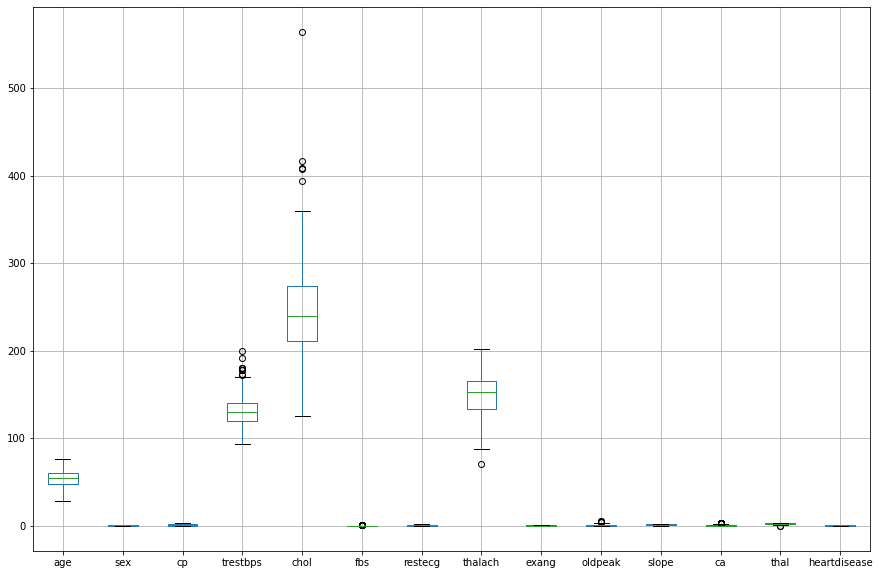

In [126]:
plt.figure(figsize = (15,10))
heart.boxplot()


Most of the column data has outliers than need to be resolved.

In [127]:
insurance.corr()

,age,bmi,children,charges,gender
age,1.000000,0.109272,0.042469,0.299008,-0.020856
bmi,0.109272,1.000000,0.012759,0.198341,0.046371
children,0.042469,0.012759,1.000000,0.067998,0.017163
charges,0.299008,0.198341,0.067998,1.000000,0.057292
gender,-0.020856,0.046371,0.017163,0.057292,1.000000


The charges and age columns are highly corelated as well as bmi and charges columns.

<AxesSubplot:>

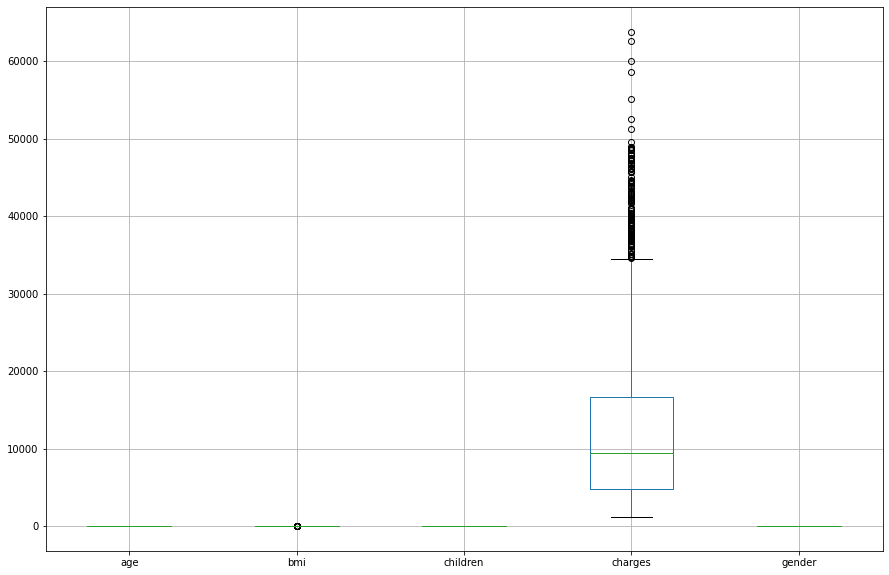

In [128]:
plt.figure(figsize = (15,10))
insurance.boxplot()

The charges column has many outliers that need to be resolved.

In [129]:
df_all = heart.merge(insurance, on="age", how = 'inner')
df_all

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease,bmi,children,smoker,region,charges,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,23.085,0,no,northeast,14451.83515,0
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,28.310,0,no,northwest,13770.09790,1
2,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,35.090,0,yes,southeast,47055.53210,1
3,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,41.470,0,no,southeast,13405.39030,1
4,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,37.700,0,yes,southwest,48824.45000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0,38.390,3,yes,southeast,41949.24410,1
6881,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0,29.260,2,no,northwest,6457.84340,1
6882,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0,30.210,3,no,northwest,7537.16390,0
6883,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0,16.815,2,no,northeast,6640.54485,1


Text(0, 0.5, 'Count')

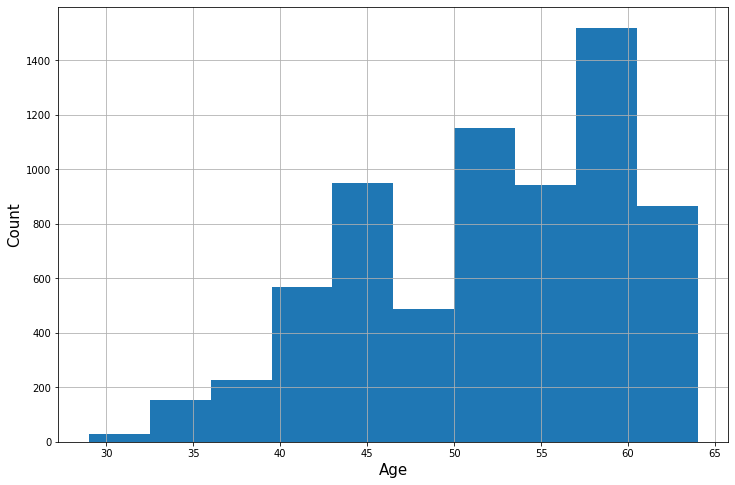

In [130]:
plt.figure(figsize = (12,8))
df_all['age'].hist()
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)

Text(0, 0.5, 'Count')

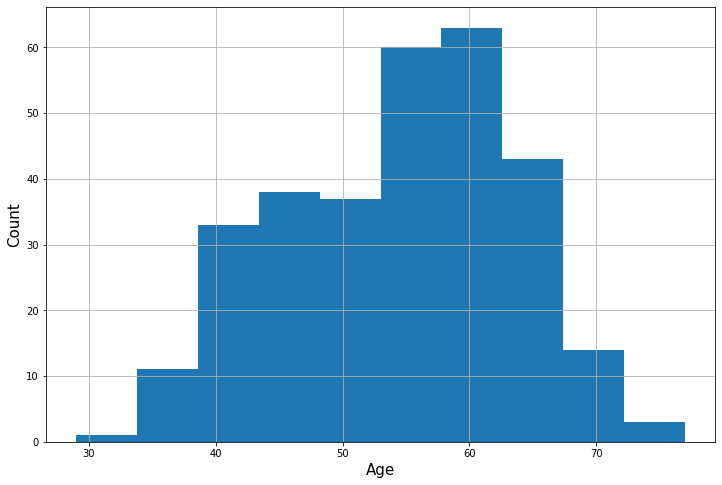

In [131]:
plt.figure(figsize = (12,8))
heart['age'].hist()
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)

The distribution of the ages became normalized hence reducing the outliers.

In [132]:
df_all.dtypes

age               int64
sex               int64
cp                int64
trestbps          int64
chol              int64
fbs               int64
restecg           int64
thalach           int64
exang             int64
oldpeak         float64
slope             int64
ca                int64
thal              int64
heartdisease      int64
bmi             float64
children          int64
smoker           object
region           object
charges         float64
gender            int64
dtype: object

In [133]:
numerical = [var for var in df_all.columns if df_all[var].dtype!='O']
numerical

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'heartdisease',
 'bmi',
 'children',
 'charges',
 'gender']

In [134]:
discrete = []

for var in numerical:
    if len(df_all[var].unique())<20:
        print(var, ' values: ', df_all[var].unique())
        discrete.append(var)
print()
print('There are {} discrete variables'.format(len(discrete)))

sex  values:  [1 0]
cp  values:  [3 2 1 0]
fbs  values:  [1 0]
restecg  values:  [0 1 2]
exang  values:  [0 1]
slope  values:  [0 2 1]
ca  values:  [0 2 1 3 4]
thal  values:  [1 2 3 0]
heartdisease  values:  [1 0]
children  values:  [0 2 3 1 4 5]
gender  values:  [0 1]

There are 11 discrete variables


In [135]:
numerical_discrete = discrete
numerical_discrete

['sex',
 'cp',
 'fbs',
 'restecg',
 'exang',
 'slope',
 'ca',
 'thal',
 'heartdisease',
 'children',
 'gender']

In [136]:
numerical_continuous = [var for var in numerical if var not in discrete]
numerical_continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'bmi', 'charges']

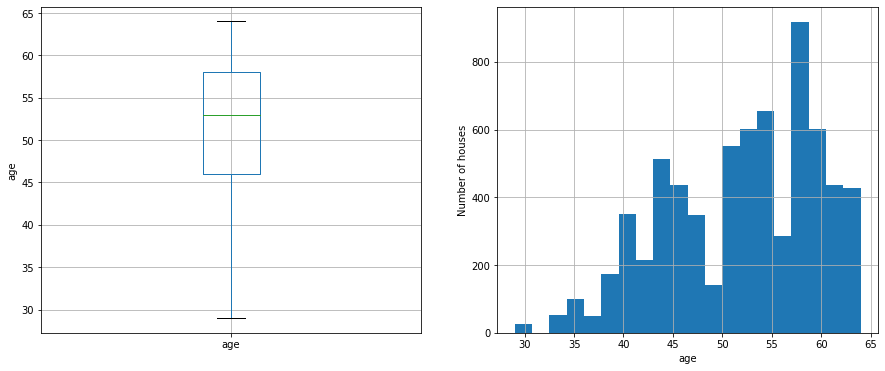

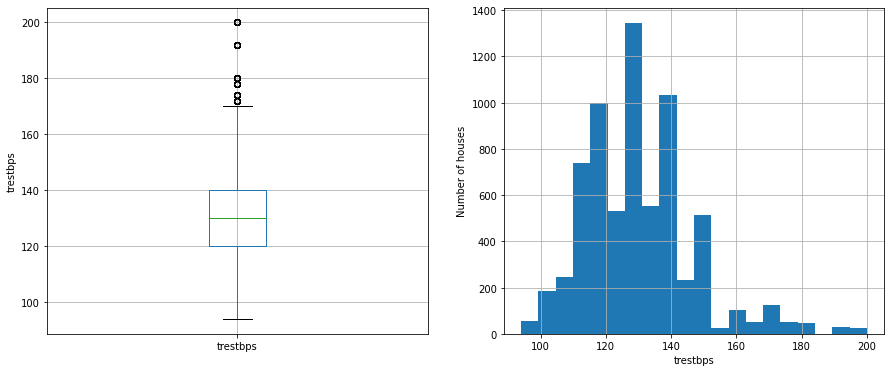

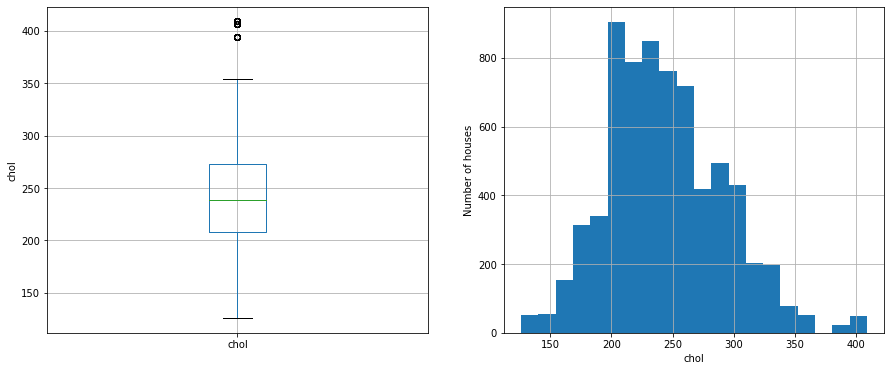

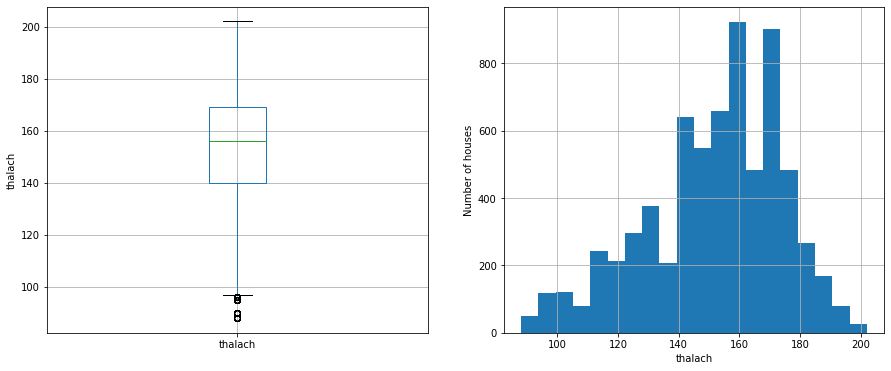

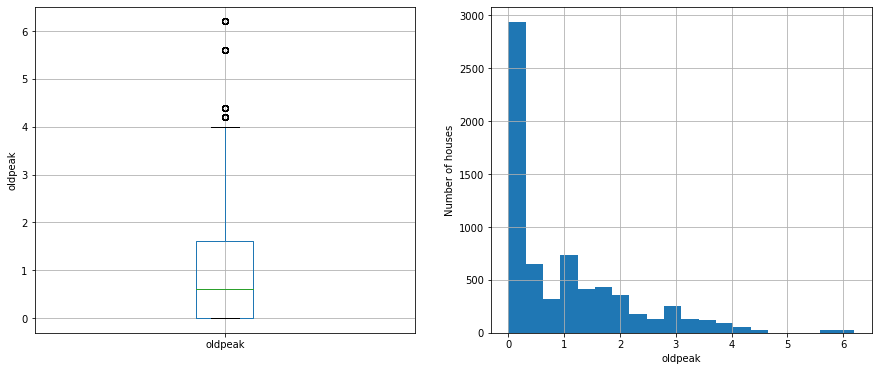

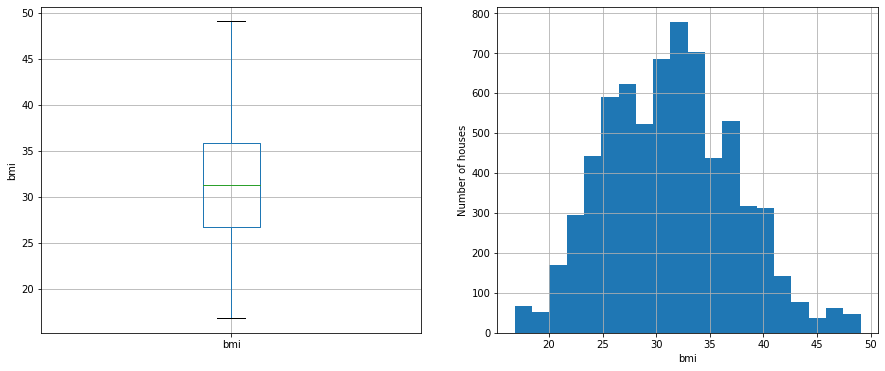

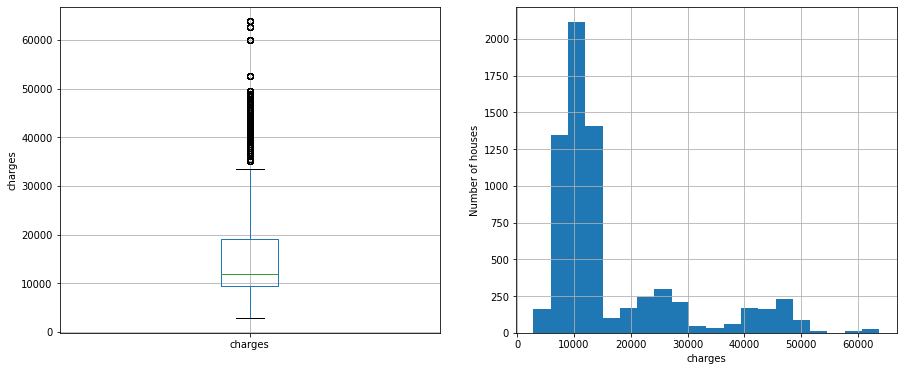

In [137]:
for var in numerical_continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = df_all.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = df_all[var].hist(bins=20)
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

In [138]:
df_all.isnull().sum()

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
thal            0
heartdisease    0
bmi             0
children        0
smoker          0
region          0
charges         0
gender          0
dtype: int64

In [139]:
from scipy import stats
zscore = np.abs(stats.zscore(df_all['charges']))
print(zscore)

[0.16624656 0.22421628 2.60612253 ... 0.75421733 0.83045896 0.78850759]


In [112]:
threshold = 2
print(np.where(zscore > 2))

(array([   2,    4,    7,   25,   27,   30,   48,   50,   53,   71,   73,
         76,   94,   96,   99,  117,  119,  122,  140,  142,  145,  163,
        165,  168,  186,  188,  191,  217,  219,  222,  242,  244,  247,
        269,  296,  323,  350,  377,  404,  431,  458,  485,  512,  532,
        547,  558,  573,  584,  599,  610,  625,  636,  651,  662,  677,
        688,  703,  714,  729,  740,  755,  766,  781,  792,  807,  814,
        821,  840,  847,  866,  873,  892,  899,  918,  925,  944,  951,
        970,  977,  996, 1003, 1022, 1029, 1048, 1055, 1074, 1081, 1100,
       1107, 1126, 1133, 1152, 1159, 1178, 1185, 1204, 1211, 1230, 1237,
       1266, 1268, 1269, 1293, 1295, 1296, 1320, 1322, 1323, 1347, 1349,
       1350, 1374, 1376, 1377, 1401, 1403, 1404, 1428, 1430, 1431, 1455,
       1457, 1458, 1482, 1484, 1485, 1509, 1511, 1512, 1536, 1538, 1539,
       1576, 1577, 1605, 1606, 1634, 1635, 1663, 1664, 1692, 1693, 1721,
       1722, 1750, 1751, 1779, 1780, 1808, 1809, 1

In [113]:
print(zscore[6880])

2.1719228422159826


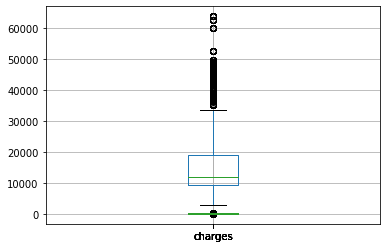

In [116]:
for var in numerical_continuous:
    fig = df_all.boxplot(column=var)

In [93]:
zscore = np.abs(stats.zscore(df_all['thalach']))
print(zscore)

[0.08255945 0.08255945 0.08255945 ... 1.33927263 1.33927263 1.33927263]


In [94]:
zscore = np.abs(stats.zscore(df_all['trestbps']))
print(zscore)

[0.87050867 0.87050867 0.87050867 ... 0.61866617 0.61866617 0.61866617]


In [95]:
zscore = np.abs(stats.zscore(df_all['oldpeak']))
print(zscore)

[1.10891174 1.10891174 1.10891174 ... 2.38822519 2.38822519 2.38822519]


In [96]:
zscore = np.abs(stats.zscore(df_all['chol']))
print(zscore)

[0.21967393 0.21967393 0.21967393 ... 0.26153482 0.26153482 0.26153482]


In [157]:
#12
X=df_all[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'bmi']]

In [180]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    y=df_all['charges']
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['age', 'bmi']


In [181]:
#13
categorical = [var for var in df_all.columns if df_all[var].dtype=='O']
categorical

['smoker', 'region']

In [182]:
chi2_check = []
for i in numerical_continuous:
    if chi2_contingency(pd.crosstab(df_all['heartdisease'], df_all[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [numerical_continuous, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

     Column              Hypothesis
0       age  Reject Null Hypothesis
1  trestbps  Reject Null Hypothesis
2      chol  Reject Null Hypothesis
3   thalach  Reject Null Hypothesis
4   oldpeak  Reject Null Hypothesis
5       bmi  Reject Null Hypothesis
6   charges  Reject Null Hypothesis


In [183]:
chi2_check = []
for i in numerical_discrete:
    if chi2_contingency(pd.crosstab(df_all['heartdisease'], df_all[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [numerical_discrete, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

          Column                      Hypothesis
0            sex          Reject Null Hypothesis
1             cp          Reject Null Hypothesis
2            fbs  Fail to Reject Null Hypothesis
3        restecg          Reject Null Hypothesis
4          exang          Reject Null Hypothesis
5          slope          Reject Null Hypothesis
6             ca          Reject Null Hypothesis
7           thal          Reject Null Hypothesis
8   heartdisease          Reject Null Hypothesis
9       children          Reject Null Hypothesis
10        gender  Fail to Reject Null Hypothesis


In [ ]:
#15
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat= df_all[['smoker','region']]
cat = cat.reshape(1,-1) 

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
dataset = np.array(columnTransformer.fit_transform(cat), dtype = np.str)